In [1]:
import cv2
import numpy as np
import datetime
import os
import matplotlib.pyplot as plt

In [2]:
def get_images(path):
    images = []
    dates = []
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            if filename.endswith('.png'):
                image = cv2.imread(os.path.join(dirname, filename))
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                images.append(image)
                epoch = filename[2:-4]
                dates.append(epoch)
                print(datetime.datetime.fromtimestamp(int(epoch)).strftime('%Y-%m-%d %H:%M:%S'))
    return images, dates

In [3]:
def subset_image(image, x, y, w, h):
    return image[y:y+h, x:x+w]

In [4]:
def get_diff(image1, image2):
    diff = cv2.absdiff(image1, image2)
    diff = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    diff = cv2.threshold(diff, 25, 255, cv2.THRESH_BINARY)[1]
    return diff

In [5]:
images, dates = get_images('final_v1/images_quadro/2')

2022-04-03 21:03:56
2022-04-03 21:04:27
2022-04-03 21:04:59
2022-04-03 21:05:30
2022-04-03 21:06:02
2022-04-03 21:06:34
2022-04-03 21:07:05
2022-04-03 21:07:37
2022-04-03 21:08:09
2022-04-03 21:08:41
2022-04-03 21:09:13
2022-04-03 21:09:45
2022-04-03 21:10:16
2022-04-03 21:10:48
2022-04-03 21:11:20
2022-04-03 21:11:52
2022-04-03 21:12:24
2022-04-03 21:12:57
2022-04-03 21:13:30
2022-04-03 21:14:02
2022-04-03 21:14:33
2022-04-03 21:15:05
2022-04-03 21:15:37
2022-04-03 21:16:10
2022-04-03 21:16:41
2022-04-03 21:17:13
2022-04-03 21:17:45
2022-04-03 21:18:17
2022-04-03 21:18:49
2022-04-03 21:19:21
2022-04-03 21:19:53
2022-04-03 21:20:25
2022-04-03 21:20:56
2022-04-03 21:21:28
2022-04-03 21:22:00
2022-04-03 21:22:32
2022-04-03 21:23:04
2022-04-03 21:23:36
2022-04-03 21:24:08
2022-04-03 21:24:40
2022-04-03 21:25:12
2022-04-03 21:28:46
2022-04-03 21:29:18
2022-04-03 21:29:50
2022-04-03 21:30:22
2022-04-03 21:30:54
2022-04-03 21:31:26
2022-04-03 21:31:58
2022-04-03 21:32:30
2022-04-03 21:33:01


In [6]:
images_fr = []
for i in range(len(images)):
    images_fr.append(subset_image(images[i], 0, 469, 251, 503))

In [7]:
print(len(images_fr))

3983


[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255   0 255 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


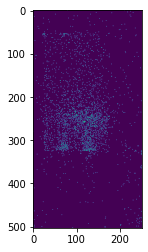

In [8]:
plt.imshow(get_diff(images_fr[1000], images_fr[1001]))
print(get_diff(images_fr[1000], images_fr[1001]))

In [9]:
print(images_fr[0].shape)

(503, 251, 3)


In [10]:
def grid_num_changes(images):
    img_changes = np.zeros((images[0].shape), np.uint8)
    img_changes = cv2.cvtColor(img_changes, cv2.COLOR_BGR2GRAY)
    for i in range(len(images)-1):
        diff = get_diff(images[i], images[i+1])
        img_changes = np.add(img_changes, diff, dtype=np.uint32)
    img_changes = np.divide(img_changes, 255)
    return img_changes

In [11]:
array_num_changes = grid_num_changes(images_fr)

In [12]:
print(np.amax(array_num_changes))

1201.0


In [13]:
print(array_num_changes)

[[ 292.  203.  214. ...  161.  129.   19.]
 [ 314.  166.  156. ...  123.  157.   48.]
 [ 166.   96.   85. ...   50.   78.   18.]
 ...
 [1201.  634.  339. ...  323.  808.  362.]
 [ 551.  165.   87. ...   59.   79.   79.]
 [ 259.  472.  215. ...   50.   95.  127.]]


In [14]:
array_num_changes[0][0] = array_num_changes[0][0]+50
print(array_num_changes)

[[ 342.  203.  214. ...  161.  129.   19.]
 [ 314.  166.  156. ...  123.  157.   48.]
 [ 166.   96.   85. ...   50.   78.   18.]
 ...
 [1201.  634.  339. ...  323.  808.  362.]
 [ 551.  165.   87. ...   59.   79.   79.]
 [ 259.  472.  215. ...   50.   95.  127.]]


In [15]:
print(np.sum(array_num_changes))

6982379.0


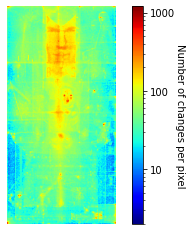

In [16]:
import matplotlib.colors as colors
from matplotlib.ticker import LogFormatter
fig, ax = plt.subplots()
im = ax.imshow(array_num_changes, norm=colors.LogNorm(vmin=np.amin(array_num_changes), vmax=np.amax(array_num_changes)), cmap='jet')
ax.axis("off")

# ax.set_title('Number of changes on the bottom left corner of r/place')

formatter = LogFormatter(10, labelOnlyBase=False)

#colorbar
cbar = fig.colorbar(im, ax=ax, format=formatter, ticks=[10, 100, 1000])
cbar.ax.set_ylabel('Number of changes per pixel', rotation=270, labelpad=10)

plt.savefig('output/num_changes.png', bbox_inches='tight', pad_inches=0, dpi=1000)
plt.show()

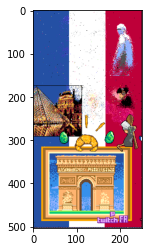

In [17]:
plt.imshow(images_fr[int(len(images_fr)/2)])